In [35]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [45]:
SN12_KRT_PATH = './data/susenas12/sn12_krt.csv'
COLUMNS = ['URUT', 'B1R1', 'B1R2', 'B1R5', 'B2R1', 'B8R2A', 'B8R2B', 'B8R2C', 'B8R3A', 'B8R3B', 'B9R1A', 'B9R1B', 'EXP_CAP', 'WERT']
def get_dataframe(path):
    return pd.read_csv(path)

- URUT: 
- B1R1: Kode Provinsi
- B1R2: Kode Kabupaten
- B1R5: Klasifikasi desa/kelurahan (apakah berstatus daerah perkotaan/pedesaan)
- B8R2A: Banyaknya anggota rumah tangga yang menguasai nomor HP yang aktif
- B8R2B: Apakah ada anggota rumah tangga yang menguasai telepon seluler (HP)?
- B8R2C: Jumlah nomor HP aktif yang dikuasai seluruh anggota keluarga
- B8R3A: Apakah di rumah tangga ini ada komputer (PC)
- B8R3B: Apakah di rumah tangga ini ada komputer (Laptop)
- B9R1A: Apa lapangan usaha atau bidang pekerjaan (utama) dari tempat pekerjaan (nama) selama seminggu terakhir?
- B9R1B: Status Pekerjaan
- EXP_CAP: Pengeluaran per kapita
- WERT: bobot

In [46]:
df_sn12_krt = get_dataframe(SN12_KRT_PATH)
df_sn12_krt['B2R1'].describe()

count    286113.000000
mean          3.895122
std           1.739939
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          30.000000
Name: B2R1, dtype: float64

In [47]:
df_raw = df_sn12_krt[COLUMNS]
df_raw

,URUT,B1R1,B1R2,B1R5,B2R1,B8R2A,B8R2B,B8R2C,B8R3A,B8R3B,B9R1A,B9R1B,EXP_CAP,WERT
0,110112500101601,11,1,1,4,1,2.0,2.0,2,2,8,2,3.434643e+05,45.876255
1,110112500101602,11,1,1,4,1,2.0,2.0,2,2,18,2,5.703095e+05,55.252186
2,110112500101603,11,1,1,4,1,4.0,4.0,1,1,18,1,1.305774e+06,20.006414
3,110112500101604,11,1,1,6,1,3.0,3.0,2,2,18,1,4.017619e+05,42.398369
4,110112500101605,11,1,1,4,1,1.0,1.0,2,2,1,1,7.000714e+05,43.420265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286108,947122001103806,94,71,2,5,1,3.0,3.0,2,1,18,1,1.648210e+06,438.129364
286109,947122001103807,94,71,2,5,1,5.0,6.0,1,1,18,1,1.959000e+06,321.015991
286110,947122001103808,94,71,2,2,1,2.0,2.0,2,2,13,2,2.233357e+06,324.770111
286111,947122001103809,94,71,2,7,1,5.0,5.0,2,1,1,2,7.117279e+05,14.112268


In [48]:
pekerjaan = {
    1: "Pertanian tanaman padi & palawija",
    2: "Hortikultura",
    3: "Perkebunan",
    4: "Perikanan",
    5: "Peternakan",
    6: "Kehutanan & pertanian lainnya",
    7: "Pertambangan & penggalian",
    8: "Industri pengolahan",
    9: "Listrik & gas",
    10: "Konstruksi/bangunan",
    11: "Perdagangan",
    12: "Hotel dan rumah makan",
    13: "Transportasi dan pergudangan",
    14: "Informasi dan komunikasi",
    15: "Keuangan dan asuransi",
    16: "Jasa pendidikan",
    17: "Jasa kesehatan",
    18: "Jasa kemasyarakatan, pemerintahan, & perorangan",
    19: "Lainnya"
}

In [49]:
new_df = df_raw.copy()
new_df["Pekerjaan"] = new_df["B9R1A"].apply(lambda x: pekerjaan.get(x))
new_df

,URUT,B1R1,B1R2,B1R5,B2R1,B8R2A,B8R2B,B8R2C,B8R3A,B8R3B,B9R1A,B9R1B,EXP_CAP,WERT,Pekerjaan
0,110112500101601,11,1,1,4,1,2.0,2.0,2,2,8,2,3.434643e+05,45.876255,Industri pengolahan
1,110112500101602,11,1,1,4,1,2.0,2.0,2,2,18,2,5.703095e+05,55.252186,"Jasa kemasyarakatan, pemerintahan, & perorangan"
2,110112500101603,11,1,1,4,1,4.0,4.0,1,1,18,1,1.305774e+06,20.006414,"Jasa kemasyarakatan, pemerintahan, & perorangan"
3,110112500101604,11,1,1,6,1,3.0,3.0,2,2,18,1,4.017619e+05,42.398369,"Jasa kemasyarakatan, pemerintahan, & perorangan"
4,110112500101605,11,1,1,4,1,1.0,1.0,2,2,1,1,7.000714e+05,43.420265,Pertanian tanaman padi & palawija
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286108,947122001103806,94,71,2,5,1,3.0,3.0,2,1,18,1,1.648210e+06,438.129364,"Jasa kemasyarakatan, pemerintahan, & perorangan"
286109,947122001103807,94,71,2,5,1,5.0,6.0,1,1,18,1,1.959000e+06,321.015991,"Jasa kemasyarakatan, pemerintahan, & perorangan"
286110,947122001103808,94,71,2,2,1,2.0,2.0,2,2,13,2,2.233357e+06,324.770111,Transportasi dan pergudangan
286111,947122001103809,94,71,2,7,1,5.0,5.0,2,1,1,2,7.117279e+05,14.112268,Pertanian tanaman padi & palawija


In [50]:
new_df.describe()

,URUT,B1R1,B1R2,B1R5,B2R1,B8R2A,B8R2B,B8R2C,B8R3A,B8R3B,B9R1A,B9R1B,EXP_CAP,WERT
count,2.861130e+05,286113.000000,286113.000000,286113.000000,286113.000000,286113.000000,228174.000000,228175.000000,286113.000000,286113.000000,286113.000000,286113.000000,2.861130e+05,286113.000000
mean,4.191669e+14,41.696068,21.884123,1.570586,3.895122,1.202511,1.982728,2.067299,1.946126,1.881225,8.919322,1.450853,7.132670e+05,221.244516
std,2.416031e+14,24.184687,26.393038,0.494993,1.739939,0.401872,1.125252,1.318828,0.225769,0.323524,6.322743,0.603250,8.526552e+05,204.481641
min,1.101125e+14,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,6.707492e+04,1.000000
25%,1.808220e+14,18.000000,4.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.272268e+05,81.114174
50%,3.504125e+14,35.000000,9.000000,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,10.000000,2.000000,5.044419e+05,149.078110
75%,6.303220e+14,63.000000,24.000000,2.000000,5.000000,1.000000,2.000000,3.000000,2.000000,2.000000,13.000000,2.000000,8.231488e+05,300.561493
max,9.471220e+14,94.000000,79.000000,2.000000,30.000000,2.000000,16.000000,60.000000,2.000000,2.000000,20.000000,2.000000,7.529981e+07,4941.000000


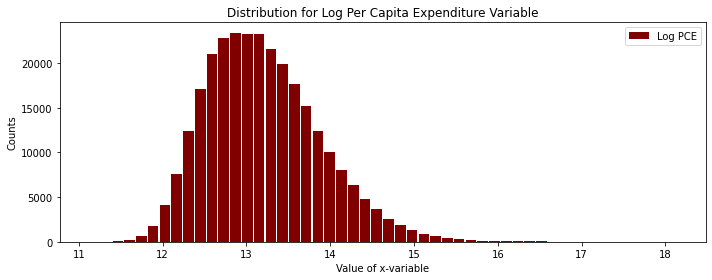

In [51]:
# Histogram for Log Expenditure per Capita Variable

new_df=new_df.assign(log_exp_cap=np.log(new_df['EXP_CAP']))
plot_exp = new_df['log_exp_cap']

plot_exp.plot.hist(grid=False, bins=50, rwidth=0.9,color='maroon',label='Log PCE')
plt.title('Distribution for Log Per Capita Expenditure Variable')
plt.xlabel('Value of x-variable')
plt.ylabel('Counts')
plt.legend(loc="best")
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

In [54]:
income = new_df[['EXP_CAP', 'B2R1', 'B8R2A', 'B8R2B', 'B8R2C']]
income = income.sort_values(by=['EXP_CAP']).dropna()
income

,EXP_CAP,B2R1,B8R2A,B8R2B,B8R2C
243301,6.707492e+04,10,1,1.0,1.0
132936,7.278571e+04,4,1,1.0,1.0
184789,8.244840e+04,9,1,1.0,1.0
140484,8.326143e+04,5,1,1.0,1.0
244490,8.663280e+04,9,1,1.0,1.0
...,...,...,...,...,...
41796,4.517169e+07,2,1,2.0,2.0
198090,4.741194e+07,1,1,1.0,2.0
181362,5.842395e+07,3,1,3.0,4.0
81428,6.003423e+07,1,1,1.0,1.0


In [56]:
income.plot(x="EXP_CAP", y=['B2R1'], kind="bar")

NameError: name 'B2R1' is not defined